In [2]:
# Reetesh Sudhakar and Roshan Desai
# CX 4230 Mini-Project 1

!pip3 install scipy
!pip3 install numpy
!pip3 install matplotlib

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [ ]:
# Simulation 1.3

# Parameters
tau = 0.8
kappa = 4

# Initial conditions
initial_conditions = [0.99, 0.01, 0.0] # S, I, R

def contagion(t, y, tau, kappa):
    S, I, R = y
    dSdt = -tau * S * I
    dIdt = tau * S * I - I / kappa
    dRdt = I / kappa
    return [dSdt, dIdt, dRdt]

# Define the time span
t_span = (0, 53)
t_step = np.arange(t_span[0], t_span[1], 0.01)

# Solve the ODEs
sol = solve_ivp(contagion, t_span, initial_conditions, t_eval=t_step, args=(tau, kappa))

for i, v in enumerate(sol.y[1]):
    if v < 0.0001:
        print(f"Stopping point at {round(t_step[i], 2), v}")
        break

# Plot the results
plt.plot(sol.t, sol.y[0], label='Susceptible (S)')
plt.plot(sol.t, sol.y[1], label='Infected (I)')
plt.plot(sol.t, sol.y[2], label='Recovered (R)')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.legend()
plt.title('Disease Model Simulation | tau=0.8 kappa=4')
plt.show()


In [ ]:
# Simulation 1.3

# Parameters
tau = 0.4
kappa = 4

# Initial conditions
initial_conditions = [0.99, 0.01, 0.0] # S, I, R

def contagion(t, y, tau, kappa):
    S, I, R = y
    dSdt = -tau * S * I
    dIdt = tau * S * I - I / kappa
    dRdt = I / kappa
    return [dSdt, dIdt, dRdt]

# Define the time span
t_span = (0, 96)
t_step = np.arange(t_span[0], t_span[1], 0.01)

# Solve the ODEs
sol = solve_ivp(contagion, t_span, initial_conditions, t_eval=t_step, args=(tau, kappa))

for i, v in enumerate(sol.y[1]):
    if v < 0.0001:
        print(f"Stopping point at {round(t_step[i], 2), v}")
        break

# Plot the results
plt.plot(sol.t, sol.y[0], label='Susceptible (S)')
plt.plot(sol.t, sol.y[1], label='Infected (I)')
plt.plot(sol.t, sol.y[2], label='Recovered (R)')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.legend()
plt.title('Disease Model Simulation | tau=0.4 kappa=4')
plt.show()


In [ ]:
# Simulation 1.3

# Parameters
tau = 0.8
kappa = 8

# Initial conditions
initial_conditions = [0.99, 0.01, 0.0] # S, I, R

def contagion(t, y, tau, kappa):
    S, I, R = y
    dSdt = -tau * S * I
    dIdt = tau * S * I - I / kappa
    dRdt = I / kappa
    return [dSdt, dIdt, dRdt]

# Define the time span
t_span = (0, 82)
t_step = np.arange(t_span[0], t_span[1], 0.01)

# Solve the ODEs
sol = solve_ivp(contagion, t_span, initial_conditions, t_eval=t_step, args=(tau, kappa))

for i, v in enumerate(sol.y[1]):
    if v < 0.0001:
        print(f"Stopping point at {round(t_step[i], 2), v}")
        break

# Plot the results
plt.plot(sol.t, sol.y[0], label='Susceptible (S)')
plt.plot(sol.t, sol.y[1], label='Infected (I)')
plt.plot(sol.t, sol.y[2], label='Recovered (R)')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.legend()
plt.title('Disease Model Simulation | tau=0.8 kappa=8')
plt.show()


In [ ]:
# 1.4 Simulations
def contagion(t, y, tau, kappa):
    S, I, R = y
    dSdt = -tau * S * I
    dIdt = tau * S * I - I / kappa
    dRdt = I / kappa
    return [dSdt, dIdt, dRdt]

# Initial conditions
initial_conditions = [0.99, 0.01, 0.0] # S, I, R

# Define the time span
t_span = (0, 100)
t_step = np.arange(t_span[0], t_span[1], 0.01)

# Set up a grid of τ and κ values
tau_values = np.linspace(0.1, 4, 10)
kappa_values = np.linspace(1, 5, 10)

print(tau_values)
print(kappa_values)

# Initialize an array to store the resulting times
resulting_times = np.zeros((len(tau_values), len(kappa_values)))

# Loop over each combination of τ and κ
for i, tau in enumerate(tau_values):
    for j, kappa in enumerate(kappa_values):
        # Solve the ODEs for the current combination of τ and κ
        sol = solve_ivp(contagion, t_span, initial_conditions, t_eval=t_step, args=(tau, kappa))

        # Find the time at which the number of infections falls below 10^-4 and store it in resulting_times[i, j]
        for idx, v in enumerate(sol.y[1]):
            if v < 0.0001:
                print(f"Stopping point at {round(t_step[idx], 2), v} for tau={round(tau, 2)} and kappa={round(kappa, 2)}")
                resulting_times[i, j] = t_step[idx]
                break

# Create a 2-D contour plot or heatmap of the resulting times as a function of τ and κ
plt.contourf(tau_values, kappa_values, resulting_times, levels=8, cmap='viridis')
plt.colorbar()
plt.xlabel('τ')
plt.ylabel('κ')
plt.title('Time at which infections fall below 10^-4')
plt.show()

Stopping point at (5.12, 9.933707571318091e-05) for tau=0.1 and kappa=1.0
Stopping point at (7.76, 9.941911765125151e-05) for tau=0.1 and kappa=1.44
Stopping point at (10.66, 9.972711058964609e-05) for tau=0.1 and kappa=1.89
Stopping point at (13.87, 9.985260595707716e-05) for tau=0.1 and kappa=2.33
Stopping point at (17.43, 9.9952948728568e-05) for tau=0.1 and kappa=2.78
Stopping point at (21.39, 9.995578559726979e-05) for tau=0.1 and kappa=3.22
Stopping point at (25.8, 9.991625163811173e-05) for tau=0.1 and kappa=3.67
Stopping point at (30.71, 9.99085582717483e-05) for tau=0.1 and kappa=4.11
Stopping point at (36.17, 9.99686052919655e-05) for tau=0.1 and kappa=4.56
Stopping point at (42.24, 9.99469159968871e-05) for tau=0.1 and kappa=5.0
Stopping point at (9.5, 9.981081302987457e-05) for tau=0.53 and kappa=1.0
Stopping point at (23.27, 9.986399235671773e-05) for tau=0.53 and kappa=1.44
Stopping point at (47.83, 9.988353140508596e-05) for tau=0.53 and kappa=1.89
Stopping point at (51.

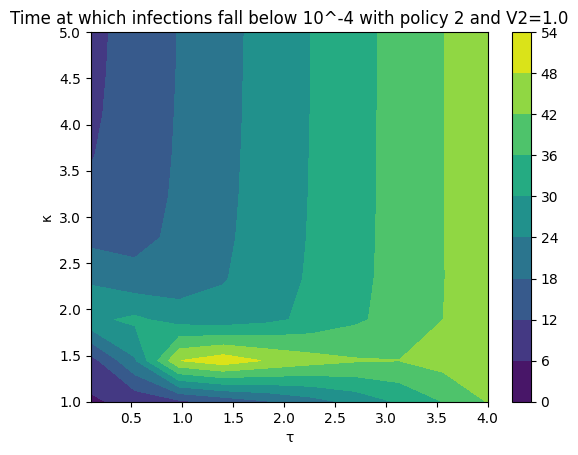

In [26]:
# 1.5 Simulations

# Policy Constants
V1 = 1.0
V2 = 1.0

def contagion1(t, y, tau, kappa):
    S, I, R, V = y
    policy = V1 * S

    dSdt = -tau * S * I - policy
    dIdt = tau * S * I - I / kappa
    dRdt = I / kappa
    dVdt = policy

    return [dSdt, dIdt, dRdt, dVdt]

def contagion2(t, y, tau, kappa):
    S, I, R, V = y
    policy = V2 * ((S * I) / (S + I))

    dSdt = -tau * S * I - policy
    dIdt = tau * S * I - I / kappa
    dRdt = I / kappa
    dVdt = policy

    return [dSdt, dIdt, dRdt, dVdt]

    

# Initial conditions
initial_conditions = [0.99, 0.01, 0.0, 0.0] # S, I, R, V

# Define the time span
t_span = (0, 100)
t_step = np.arange(t_span[0], t_span[1], 0.01)

# Set up a grid of τ and κ values
tau_values = np.linspace(0.1, 4, 10)
kappa_values = np.linspace(1, 5, 10)

# print(tau_values)
# print(kappa_values)

# Initialize an array to store the resulting times
resulting_times = np.zeros((len(tau_values), len(kappa_values)))

# Loop over each combination of τ and κ
for i, tau in enumerate(tau_values):
    for j, kappa in enumerate(kappa_values):
        # Solve the ODEs for the current combination of τ and κ
        # sol = solve_ivp(contagion1, t_span, initial_conditions, t_eval=t_step, args=(tau, kappa))
        sol = solve_ivp(contagion2, t_span, initial_conditions, t_eval=t_step, args=(tau, kappa))

        # Find the time at which the number of infections falls below 10^-4 and store it in resulting_times[i, j]
        for idx, v in enumerate(sol.y[1]):
            if v < 0.0001:
                print(f"Stopping point at {round(t_step[idx], 2), v} for tau={round(tau, 2)} and kappa={round(kappa, 2)}")
                resulting_times[i, j] = t_step[idx]
                break

# Create a 2-D contour plot or heatmap of the resulting times as a function of τ and κ
plt.contourf(tau_values, kappa_values, resulting_times, levels=8, cmap='viridis')
plt.colorbar()
plt.xlabel('τ')
plt.ylabel('κ')
# plt.title(f'Time at which infections fall below 10^-4 with policy 1 and V1={V1}')
# plt.savefig(f'assets/policy1-{V1}.png')
plt.title(f'Time at which infections fall below 10^-4 with policy 2 and V2={V2}')
plt.savefig(f'assets/policy2-{V2}.png')
plt.show()